<a href="https://colab.research.google.com/github/hyakuroume/-/blob/main/%E3%82%BB%E3%82%B0%E3%83%A1%E3%83%B3%E3%83%86%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install segment-anything

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("batuhanyil/electron-microscopy-particle-segmentation")

print("Path to dataset files:", path)

100%|██████████| 113M/113M [00:02<00:00, 54.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1


In [6]:
! cd /root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1

In [9]:
!ls /root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1

images	segmaps


In [12]:
!ls /root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1/images

00655d9628.png	31f17306c8.png	5eb66b74ea.png	85dedcfd30.png	b1fc590830.png	dc20484021.png
0113230c21.png	33f8a59619.png	5f42a8d4a9.png	85f5efb77d.png	b23c478d84.png	dc25ff5266.png
0144266d21.png	3430b20071.png	5fc8c5b53c.png	864a2a6ccf.png	b2a7683174.png	dcfbfa74e4.png
01ac659240.png	345fb7ab68.png	60c63e2383.png	87429394b0.png	b2f6f1bbf9.png	ddffc403e3.png
027f25010a.png	34864e691e.png	60feb7de8f.png	88808139d3.png	b392e4784f.png	de1d3f1409.png
0289bd97e6.png	34f4fb273d.png	611b9564a4.png	891f96f60d.png	b3e7900e39.png	dedf11eb6c.png
032bd4a6b1.png	3537f150cd.png	6169a602a0.png	893215335a.png	b452204939.png	dfeaa0d54b.png
0384c4e782.png	3692286ecf.png	62223ab32f.png	89e4044418.png	b4ab2ea927.png	e071eefebb.png
03a1d18cc6.png	36de69b2c0.png	62594342ac.png	8b40ed2a82.png	b5ba9813a4.png	e111fb569d.png
03cd0b2741.png	37ce835fb2.png	627acee9c4.png	8b7ce99d43.png	b616ffa779.png	e1adc2ba25.png
04dbda93f9.png	391ef00939.png	62a54f335d.png	8bf3782470.png	b657336f23.png	e211d9d7ac.png
065d8e352c

In [14]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-728s85wp
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-728s85wp
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


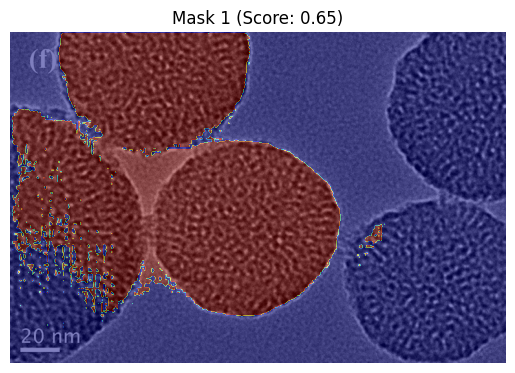

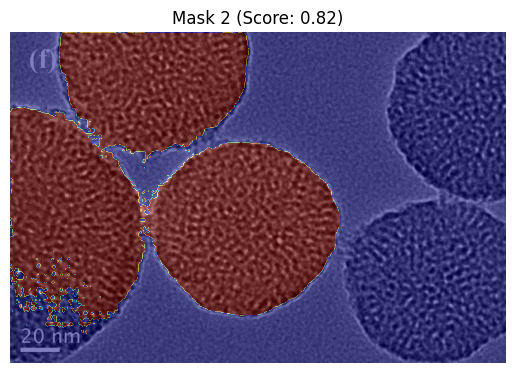

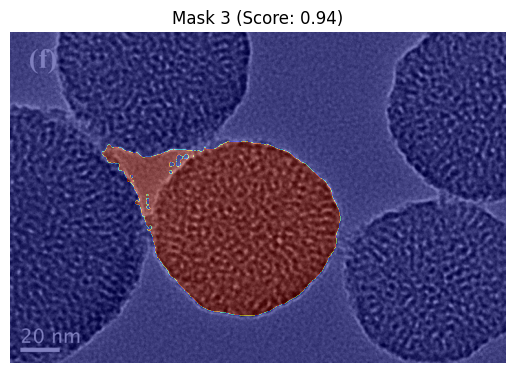

In [38]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt

# SAMのモデルをロード
sam_checkpoint = "/content/sam_vit_b_01ec64.pth"  # SAMの学習済みモデル（適切なパスを指定）
model_type = "vit_b"  # SAMモデルのタイプ（vit_b, vit_l, vit_h）

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 顕微鏡画像を読み込み
image_path = "/root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1/images/0384c4e782.png"  # 処理したい顕微鏡画像のパス
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCVの画像はBGRなのでRGBに変換

predictor.set_image(image)

# セグメンテーションの初期点を指定（例: マニュアルで中央の点を指定）
input_points = np.array([[150, 200], [300, 400]])  # 適切な座標を設定
input_labels = np.array([1, 1])  # 1: フォアグラウンドのポイント

# セグメンテーションを実行
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

# 結果を表示
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5, cmap="jet")  # セグメンテーションマスクを重ねる
    plt.title(f"Mask {i + 1} (Score: {scores[i]:.2f})")
    plt.axis("off")
    plt.show()

# マスクの保存（任意）
for i, mask in enumerate(masks):
    mask_image = (mask * 255).astype(np.uint8)  # バイナリマスクを画像に変換
    cv2.imwrite(f"mask_{i + 1}.png", mask_image)


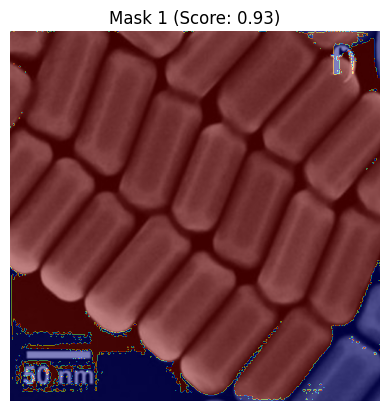

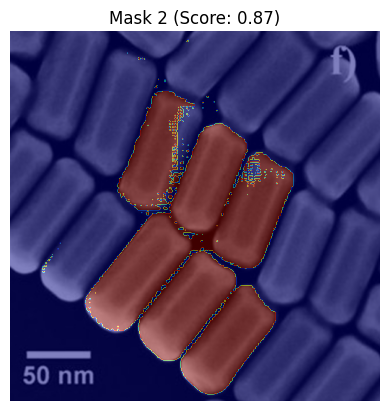

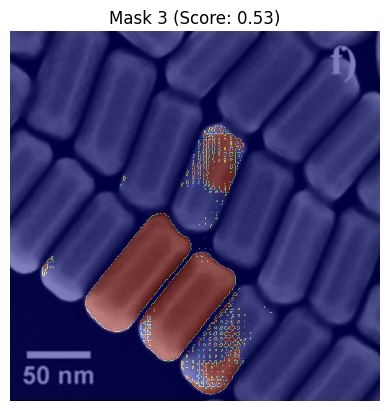

In [29]:
import cv2
import numpy as np
import torch
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt

# SAMのモデルをロード
sam_checkpoint = "/content/sam_vit_b_01ec64.pth"  # SAMの学習済みモデル（適切なパスを指定）
model_type = "vit_b"  # SAMモデルのタイプ（vit_b, vit_l, vit_h）

device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

# 顕微鏡画像を読み込み
image_path = "/root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1/images/08549eb98f.png"  # 処理したい顕微鏡画像のパス
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCVの画像はBGRなのでRGBに変換

predictor.set_image(image)

# セグメンテーションの初期点を指定（例: マニュアルで中央の点を指定）
input_points = np.array([[150, 200], [300, 400]])  # 適切な座標を設定
input_labels = np.array([1, 1])  # 1: フォアグラウンドのポイント

# セグメンテーションを実行
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

# 結果を表示
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5, cmap="jet")  # セグメンテーションマスクを重ねる
    plt.title(f"Mask {i + 1} (Score: {scores[i]:.2f})")
    plt.axis("off")
    plt.show()

# マスクの保存（任意）
for i, mask in enumerate(masks):
    mask_image = (mask * 255).astype(np.uint8)  # バイナリマスクを画像に変換
    cv2.imwrite(f"mask_{i + 1}.png", mask_image)


In [39]:
def calculate_iou(mask, ground_truth):
    """
    IoUを計算する関数。
    mask: セグメンテーション結果 (numpy array)
    ground_truth: グラウンドトゥルース (numpy array, 同じサイズ)
    """
    intersection = np.logical_and(mask, ground_truth).sum()
    union = np.logical_or(mask, ground_truth).sum()
    if union == 0:
        return 0.0
    return intersection / union


In [40]:
# グラウンドトゥルースマスクを読み込む
ground_truth_path = "/root/.cache/kagglehub/datasets/batuhanyil/electron-microscopy-particle-segmentation/versions/1/segmaps/0384c4e782.png"  # グラウンドトゥルースのパス
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)  # グレースケールで読み込む
ground_truth = (ground_truth > 127).astype(np.uint8)  # 0/1のバイナリマスクに変換


In [41]:
ious = []
for i, mask in enumerate(masks):
    # マスクをバイナリ形式に変換
    predicted_mask = (mask > 0.5).astype(np.uint8)
    iou = calculate_iou(predicted_mask, ground_truth)
    ious.append(iou)
    print(f"Mask {i + 1} IoU: {iou:.3f}")

# 最もIoUが高いマスクを特定
best_mask_index = np.argmax(ious)
print(f"Best Mask: {best_mask_index + 1}, IoU: {ious[best_mask_index]:.3f}")


Mask 1 IoU: 0.000
Mask 2 IoU: 0.000
Mask 3 IoU: 0.000
Best Mask: 1, IoU: 0.000


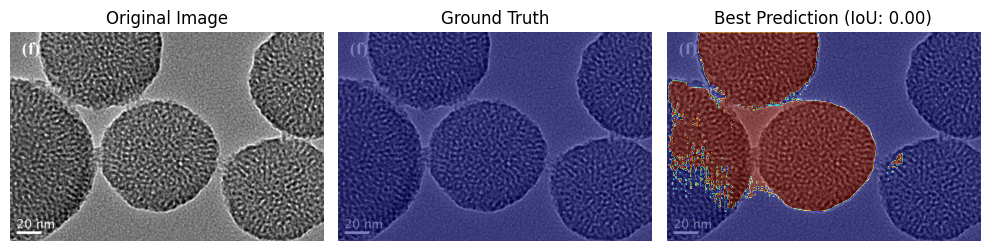

In [42]:
# 最もIoUが高いマスクを可視化
best_mask = masks[best_mask_index]

plt.figure(figsize=(10, 5))

# 元画像
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# グラウンドトゥルース
plt.subplot(1, 3, 2)
plt.imshow(image)
plt.imshow(ground_truth, alpha=0.5, cmap="jet")
plt.title("Ground Truth")
plt.axis("off")

# セグメンテーション結果
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.imshow(best_mask, alpha=0.5, cmap="jet")
plt.title(f"Best Prediction (IoU: {ious[best_mask_index]:.2f})")
plt.axis("off")

plt.tight_layout()
plt.show()


Mask 1: Score = 0.653, IoU = 0.000
Mask 2: Score = 0.816, IoU = 0.000
Mask 3: Score = 0.940, IoU = 0.000


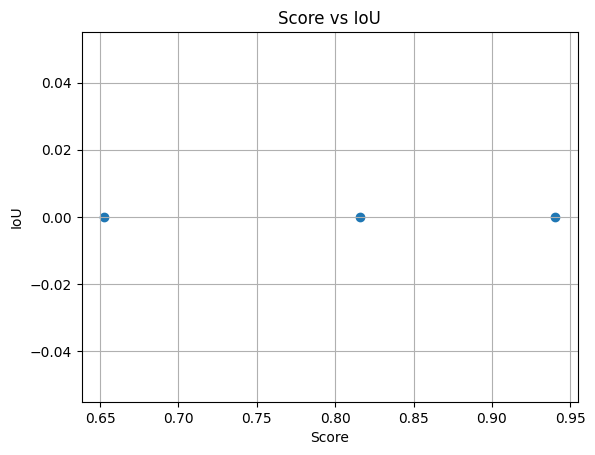

In [43]:
# スコアとIoUを比較
for i, (score, iou) in enumerate(zip(scores, ious)):
    print(f"Mask {i + 1}: Score = {score:.3f}, IoU = {iou:.3f}")

# スコアとIoUをプロット
plt.figure()
plt.scatter(scores, ious)
plt.xlabel("Score")
plt.ylabel("IoU")
plt.title("Score vs IoU")
plt.grid()
plt.show()
